In [1]:
from utils.MR import *
from datetime import datetime
import glob
import sdds
import matplotlib.pyplot as plt

In [2]:
def get_average_profile(my_profiles_amp): #  from utils/MR.py
    average_profile = np.mean(my_profiles_amp, axis=0) 
    baseline = np.mean(average_profile[0:20]) 
    average_profile -= baseline
    return baseline, average_profile

In [3]:
path2files='SMR.SCOPE13.CH01@Acquisition/' # path to MR data, they should be unziped (.sdds)
files_list = sorted(glob.glob(path2files+'*')) # create a list with all the MR data

In [4]:
sdds_data = sdds.read(files_list[0]) # here the analysis is performed for the acquistion 0

In [5]:
profiles_amp =  sdds_data.values['value']
triggerStamps = sdds_data.values['triggerStamp']
start_str = str(datetime.fromtimestamp(triggerStamps [0]/1e9))
end_str = str(datetime.fromtimestamp(triggerStamps [-1]/1e9))

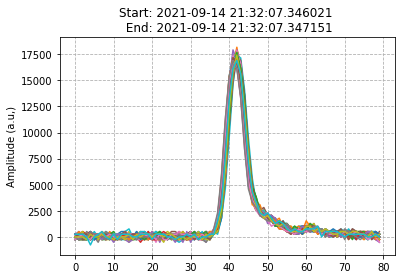

In [6]:
# plot all profiles for the acquisition period defined by start, end
# Comment: The profiles are assymetric. This is the limitation of the mountain range instrument.
fig, ax = plt.subplots()
for i in range(len(profiles_amp)):
    ax.plot(profiles_amp[i])
ax.set_title(f'Start: {start_str} \n End: {end_str}')
ax.set_ylabel('Amplitude (a.u,)')
ax.grid(ls='--')

In [7]:
# compute bunch profile, averaged over the acquisition period

In [8]:
baseline, average_profile = get_average_profile(profiles_amp)

In [9]:
# Get difference between two datetimes in milliseconds
date_format_str = '%Y-%m-%d %H:%M:%S.%f'
start = datetime.strptime(start_str, date_format_str)
end =   datetime.strptime(end_str, date_format_str)
# Get the interval between two datetimes as timedelta object
diff = end - start
# Get the interval in milliseconds
diff_in_milli_secs = diff.total_seconds() * 1000
print('Difference between two datetimes in milliseconds:')
print(diff_in_milli_secs)

Difference between two datetimes in milliseconds:
1.13


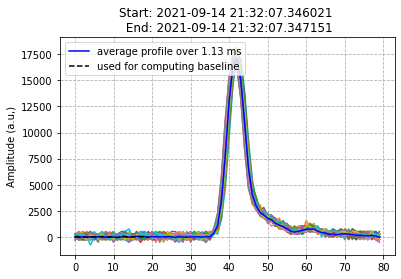

In [10]:
fig, ax = plt.subplots()
for i in range(len(profiles_amp)):
    ax.plot(profiles_amp[i])
ax.plot(average_profile, c='b', label=f'average profile over {diff_in_milli_secs} ms')
ax.plot(average_profile[0:20], c='k', ls='--', label='used for computing baseline')
ax.set_title(f'Start: {start_str} \n End: {end_str}')
ax.set_ylabel('Amplitude (a.u,)')
ax.legend(loc=2)
ax.grid(ls='--')


In [11]:
time_axis = np.float_(range(profiles_amp.shape[1]))*sdds_data.values['sampleInterval']-profiles_amp.shape[1]*sdds_data.values['sampleInterval']/2.

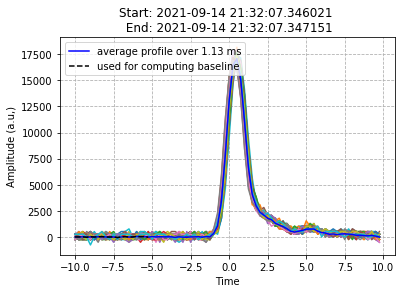

In [12]:
fig, ax = plt.subplots()
for i in range(len(profiles_amp)):
    ax.plot(time_axis, profiles_amp[i])
ax.plot(time_axis, average_profile, c='b', label=f'average profile over {diff_in_milli_secs} ms')
ax.plot(time_axis[0:20], list(average_profile[0:20]), c='k', ls='--', label='used for computing baseline')
ax.set_title(f'Start: {start_str} \n End: {end_str}')
ax.set_ylabel('Amplitude (a.u,)')
ax.set_xlabel('Time')
ax.legend(loc=2)
ax.grid(ls='--')
# negative time?

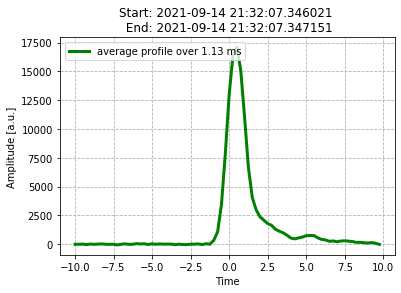

In [13]:
fig, ax = plt.subplots()

ax.plot(time_axis, average_profile, c='g', lw=3, label=f'average profile over {diff_in_milli_secs} ms')

ax.set_title(f'Start: {start_str} \n End: {end_str}')
ax.set_ylabel('Amplitude [a.u.]')
ax.set_xlabel('Time')
ax.legend(loc=2)
ax.grid(ls='--')
# negative time?

In [14]:
## Plot average profile with the fit

In [15]:
mr_overview = pickle.load(open('mr_overview.pkl', 'rb'))
sigma_t = mr_overview['LHCMD4']['sigma_t'][0]
mu =  mr_overview['LHCMD4']['mu0'][0]
amp = mr_overview['LHCMD4']['ampl'][0]
p=[amp, mu, sigma_t]
fitfunc = lambda p, x: p[0]*np.exp(-((x-p[1])**2)/(2.*p[2]**2)) # Gaussian function

In [16]:
my_fit =fitfunc(p, time_axis)

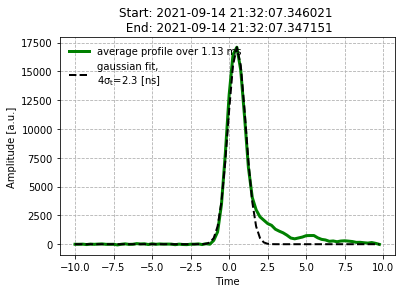

In [20]:
fig, ax = plt.subplots()

ax.plot(time_axis, average_profile, c='g', lw=3, label=f'average profile over {diff_in_milli_secs} ms')
ax.plot(time_axis, my_fit, c='k', lw=2, ls='--', label=f'gaussian fit,\n' + r'$\mathrm{4\sigma_t}$'+f'={4*sigma_t:.2} [ns]')

ax.set_title(f'Start: {start_str} \n End: {end_str}')
ax.set_ylabel('Amplitude [a.u.]')
ax.set_xlabel('Time')
ax.legend(loc=2, frameon=False)
ax.grid(ls='--')